In [1]:
!pip install pennylane pennylane-lightning tensorflow scikit-learn matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 10.7 MB/s eta 0:00:00


Sample x_basis[0]: [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

Basis Encoding Outputs:
Sample 0: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 1: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 2: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 3: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample 4: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


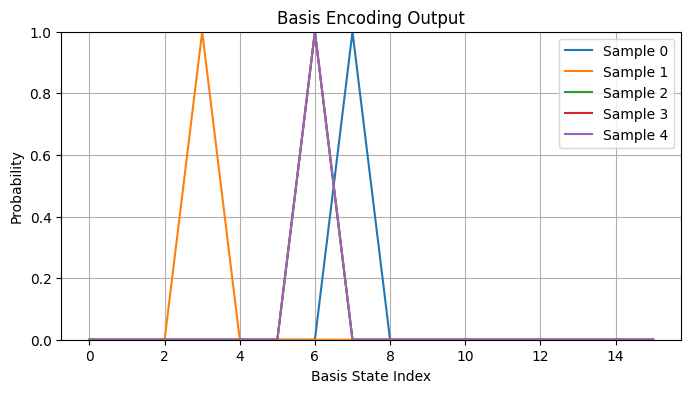

In [32]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

# Loading and preprocessing MNIST (digits 0 & 1)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0

# Downsample to 4x4
x_resized = np.array([resize(img, (4, 4), mode='reflect') for img in x_train])
x_flat = x_resized.reshape(-1, 16)

# Filter for digits 0 and 1
mask = (y_train == 0) | (y_train == 1)
x_flat = x_flat[mask]
y_flat = y_train[mask]

x_data = x_flat[:5]
y_data = y_flat[:5]

# Threshold basis
x_basis = (x_data > 0.01).astype(int)
print("Sample x_basis[0]:", x_basis[0])

# Setup device
dev_basis = qml.device("default.qubit", wires=4)

# Only use first 4 bits for this example
@qml.qnode(dev_basis)
def basis_circuit(x):
    for i in range(4):
        if x[i] == 1:
            qml.PauliX(wires=i)
    return qml.probs(wires=range(4))

# Run circuit
basis_outputs = [basis_circuit(x[:4]) for x in x_basis]
print("\nBasis Encoding Outputs:")
for i, out in enumerate(basis_outputs):
    print(f"Sample {i}: {np.round(out, 3)}")

# Plot
def plot_encoding_outputs(encoded_data, title):
    plt.figure(figsize=(8, 4))
    for i, sample in enumerate(encoded_data):
        plt.plot(sample, label=f"Sample {i}")
    plt.title(title)
    plt.xlabel("Basis State Index")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_encoding_outputs(basis_outputs, "Basis Encoding Output")


Sample x_angle[0]: [0.   0.19 0.77999997 0.11 0.1  1.03999996 1.29999995 0.50999999
 0.31999999 0.98000002 0.80000001 0.34 0.15000001 0.82999998 0.31999999
 0.02]

Angle Encoding Outputs:
Sample 0: [0.846 0.003 0.142 0.    0.008 0.    0.001 0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Sample 1: [0.969 0.003 0.028 0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Sample 2: [0.96  0.    0.016 0.    0.024 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Sample 3: [0.993 0.    0.004 0.    0.003 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]
Sample 4: [0.99  0.    0.003 0.    0.007 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.   ]


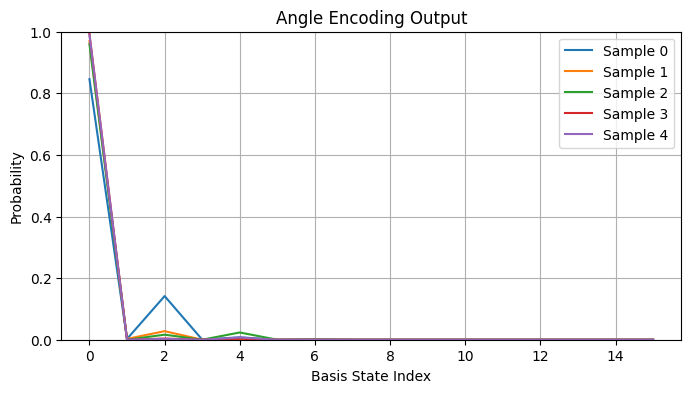

In [33]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

# Loading and preprocessing MNIST (digits 0 & 1)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0

# Downsample to 4x4
x_resized = np.array([resize(img, (4, 4), mode='reflect') for img in x_train])
x_flat = x_resized.reshape(-1, 16)

# Filter for digits 0 and 1
mask = (y_train == 0) | (y_train == 1)
x_flat = x_flat[mask]
y_flat = y_train[mask]

x_data = x_flat[:5]
y_data = y_flat[:5]

# Prepare angle inputs
x_angle = x_data * np.pi
print("Sample x_angle[0]:", np.round(x_angle[0], 2))

dev_angle = qml.device("default.qubit", wires=4)
#angle encoding
@qml.qnode(dev_angle)
def angle_circuit(x):
    for i in range(4):
        qml.RY(x[i], wires=i)
    return qml.probs(wires=range(4))

# Run circuit
angle_outputs = [angle_circuit(x[:4]) for x in x_angle]
print("\nAngle Encoding Outputs:")
for i, out in enumerate(angle_outputs):
    print(f"Sample {i}: {np.round(out, 3)}")

# Plot
def plot_encoding_outputs(encoded_data, title):
    plt.figure(figsize=(8, 4))
    for i, sample in enumerate(encoded_data):
        plt.plot(sample, label=f"Sample {i}")
    plt.title(title)
    plt.xlabel("Basis State Index")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_encoding_outputs(angle_outputs, "Angle Encoding Output")


Sample x_amplitude[0]: [0.   0.08 0.31 0.04 0.04 0.41 0.51999998 0.2  0.13 0.38999999 0.31999999
 0.13 0.06 0.33000001 0.13 0.01]

Amplitude Encoding Outputs:
Sample 0: [0.    0.006 0.096 0.002 0.001 0.17200001 0.26699999 0.042 0.017
 0.15099999 0.102 0.018 0.003 0.108 0.016 0.   ]
Sample 1: [0.    0.    0.035 0.003 0.    0.017 0.37099999 0.005 0.    0.31600001
 0.081 0.    0.001 0.168 0.002 0.   ]
Sample 2: [0.    0.032 0.022 0.    0.    0.134 0.208 0.    0.    0.077 0.414 0.
 0.    0.005 0.106 0.   ]
Sample 3: [0.    0.012 0.014 0.    0.    0.164 0.241 0.    0.    0.105 0.34799999
 0.    0.    0.017 0.099 0.   ]
Sample 4: [0.    0.024 0.01  0.    0.    0.207 0.197 0.    0.    0.19599999 0.237
 0.    0.    0.045 0.083 0.   ]


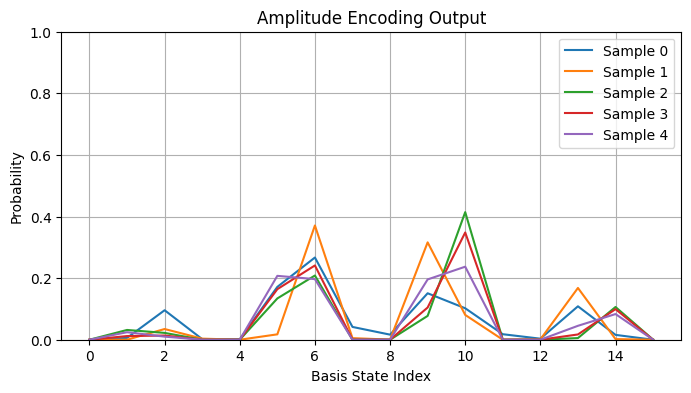

In [34]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

# Loading and preprocessing MNIST (digits 0 & 1)
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0

# Downsample to 4x4 (16 pixels)
x_resized = np.array([resize(img, (4, 4), mode='reflect') for img in x_train])
x_flat = x_resized.reshape(-1, 16)

# Filtering digits 0 and 1
mask = (y_train == 0) | (y_train == 1)
x_flat = x_flat[mask]
y_flat = y_train[mask]

x_data = x_flat[:5]
y_data = y_flat[:5]

# Normalize each sample to unit vector (for AmplitudeEmbedding)
def normalize_vector(v):
    norm = np.linalg.norm(v)
    return v / norm if norm > 1e-6 else np.ones_like(v) / np.sqrt(len(v))

x_amplitude = np.array([normalize_vector(x) for x in x_data])
print("Sample x_amplitude[0]:", np.round(x_amplitude[0], 2))

dev_amp = qml.device("default.qubit", wires=4)

# Amplitude encoding circuit
@qml.qnode(dev_amp)
def amplitude_circuit(x):
    qml.AmplitudeEmbedding(x, wires=range(4), normalize=True)
    return qml.probs(wires=range(4))

amp_outputs = [amplitude_circuit(x) for x in x_amplitude]
print("\nAmplitude Encoding Outputs:")
for i, out in enumerate(amp_outputs):
    print(f"Sample {i}: {np.round(out, 3)}")

# Plotting function
def plot_encoding_outputs(encoded_data, title):
    plt.figure(figsize=(8, 4))
    for i, sample in enumerate(encoded_data):
        plt.plot(sample, label=f"Sample {i}")
    plt.title(title)
    plt.xlabel("Basis State Index")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_encoding_outputs(amp_outputs, "Amplitude Encoding Output")
